In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as exp
from sklearn.preprocessing import LabelEncoder,StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import f1_score


In [2]:
df = pd.read_csv('credit_train.csv')
df

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,Fully Paid,445412.0,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,NaN,6.0,1.0,228190.0,416746.0,1.0,0.0
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,Fully Paid,262328.0,Short Term,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,8.0,35.0,0.0,229976.0,850784.0,0.0,0.0
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,Fully Paid,99999999.0,Short Term,741.0,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,29.0,18.0,1.0,297996.0,750090.0,0.0,0.0
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,Fully Paid,347666.0,Long Term,721.0,806949.0,3 years,Own Home,Debt Consolidation,8741.90,12.0,NaN,9.0,0.0,256329.0,386958.0,0.0,0.0
4,d4062e70-befa-4995-8643-a0de73938182,81536ad9-5ccf-4eb8-befb-47a4d608658e,Fully Paid,176220.0,Short Term,NaN,NaN,5 years,Rent,Debt Consolidation,20639.70,6.1,NaN,15.0,0.0,253460.0,427174.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100509,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100510,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100511,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100512,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100514 entries, 0 to 100513
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Loan ID                       100000 non-null  object 
 1   Customer ID                   100000 non-null  object 
 2   Loan Status                   100000 non-null  object 
 3   Current Loan Amount           100000 non-null  float64
 4   Term                          100000 non-null  object 
 5   Credit Score                  80846 non-null   float64
 6   Annual Income                 80846 non-null   float64
 7   Years in current job          95778 non-null   object 
 8   Home Ownership                100000 non-null  object 
 9   Purpose                       100000 non-null  object 
 10  Monthly Debt                  100000 non-null  float64
 11  Years of Credit History       100000 non-null  float64
 12  Months since last delinquent  46859 non-null

In [4]:
df.describe()

,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
count,1.000000e+05,80846.000000,8.084600e+04,100000.000000,100000.000000,46859.000000,100000.00000,100000.000000,1.000000e+05,9.999800e+04,99796.000000,99990.000000
mean,1.176045e+07,1076.456089,1.378277e+06,18472.412336,18.199141,34.901321,11.12853,0.168310,2.946374e+05,7.607984e+05,0.117740,0.029313
std,3.178394e+07,1475.403791,1.081360e+06,12174.992609,7.015324,21.997829,5.00987,0.482705,3.761709e+05,8.384503e+06,0.351424,0.258182
min,1.080200e+04,585.000000,7.662700e+04,0.000000,3.600000,0.000000,0.00000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,1.796520e+05,705.000000,8.488440e+05,10214.162500,13.500000,16.000000,8.00000,0.000000,1.126700e+05,2.734380e+05,0.000000,0.000000
50%,3.122460e+05,724.000000,1.174162e+06,16220.300000,16.900000,32.000000,10.00000,0.000000,2.098170e+05,4.678740e+05,0.000000,0.000000
75%,5.249420e+05,741.000000,1.650663e+06,24012.057500,21.700000,51.000000,14.00000,0.000000,3.679588e+05,7.829580e+05,0.000000,0.000000
max,1.000000e+08,7510.000000,1.655574e+08,435843.280000,70.500000,176.000000,76.00000,15.000000,3.287897e+07,1.539738e+09,7.000000,15.000000


## Dealing with missing values

In [5]:
df.drop_duplicates(inplace=True)

In [6]:
df.isnull().sum()

Loan ID                             1
Customer ID                         1
Loan Status                         1
Current Loan Amount                 1
Term                                1
Credit Score                    19155
Annual Income                   19155
Years in current job             3803
Home Ownership                      1
Purpose                             1
Monthly Debt                        1
Years of Credit History             1
Months since last delinquent    48338
Number of Open Accounts             1
Number of Credit Problems           1
Current Credit Balance              1
Maximum Open Credit                 3
Bankruptcies                      191
Tax Liens                          10
dtype: int64

In [7]:
df.dropna()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,Fully Paid,99999999.0,Short Term,741.0,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,29.0,18.0,1.0,297996.0,750090.0,0.0,0.0
6,273581de-85d8-4332-81a5-19b04ce68666,90a75dde-34d5-419c-90dc-1e58b04b3e35,Fully Paid,217646.0,Short Term,730.0,1184194.0,< 1 year,Home Mortgage,Debt Consolidation,10855.08,19.6,10.0,13.0,1.0,122170.0,272052.0,1.0,0.0
8,8af915d9-9e91-44a0-b5a2-564a45c12089,af534dea-d27e-4fd6-9de8-efaa52a78ec0,Fully Paid,548746.0,Short Term,678.0,2559110.0,2 years,Rent,Debt Consolidation,18660.28,22.6,33.0,4.0,0.0,437171.0,555038.0,0.0,0.0
10,32c2e48f-1ba8-45e0-a530-9a6622c18d9c,0de7bcdb-ebf4-4608-ba39-05f083f855b6,Fully Paid,99999999.0,Short Term,728.0,714628.0,3 years,Rent,Debt Consolidation,11851.06,16.0,76.0,16.0,0.0,203965.0,289784.0,0.0,0.0
12,403d7235-0284-4bb6-919a-09402fecbf7b,11581f68-de3c-49d8-80d9-22268ebb323b,Fully Paid,99999999.0,Short Term,740.0,776188.0,< 1 year,Own Home,Debt Consolidation,11578.22,8.5,25.0,6.0,0.0,134083.0,220220.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99985,3b2a09bb-3467-4d2f-bd8f-260fdc5760be,da2f2054-0f33-4b84-9234-508e42f6f493,Fully Paid,179454.0,Short Term,708.0,1356068.0,4 years,Home Mortgage,Debt Consolidation,22318.54,22.7,21.0,25.0,0.0,387410.0,1705616.0,0.0,0.0
99990,686017b3-dc24-4f8a-af92-0bd077452d3d,1a583add-21ba-410f-9c42-757c4ed19322,Fully Paid,99999999.0,Short Term,742.0,1190046.0,< 1 year,Rent,other,11969.81,20.1,16.0,9.0,0.0,37392.0,134442.0,0.0,0.0
99994,8506a4e9-af7d-47d2-a1bf-7ea2c41858f0,be67200e-1ef1-4b63-86a6-2bf27d3c704d,Fully Paid,210584.0,Short Term,719.0,783389.0,1 year,Home Mortgage,Other,3727.61,17.4,18.0,6.0,0.0,456.0,259160.0,0.0,0.0
99996,06eba04f-58fc-424a-b666-ed72aa008900,77f2252a-b7d1-4b07-a746-1202a8304290,Fully Paid,99999999.0,Short Term,732.0,1289416.0,1 year,Rent,Debt Consolidation,13109.05,9.4,21.0,22.0,0.0,153045.0,509234.0,0.0,0.0


In [8]:
df.dropna(thresh = 17,inplace=True)

In [9]:
df.isnull().sum()

Loan ID                             0
Customer ID                         0
Loan Status                         0
Current Loan Amount                 0
Term                                0
Credit Score                     8252
Annual Income                    8252
Years in current job             2992
Home Ownership                      0
Purpose                             0
Monthly Debt                        0
Years of Credit History             0
Months since last delinquent    37869
Number of Open Accounts             0
Number of Credit Problems           0
Current Credit Balance              0
Maximum Open Credit                 1
Bankruptcies                      148
Tax Liens                           5
dtype: int64

In [10]:
for i in df.columns:
    if df[i].isnull().any():
        nullperc = df[i].isnull().sum()/df.shape[0] * 100
        print(f'null percentage of {i} is {round(nullperc,ndigits=3)}')


null percentage of Credit Score is 10.461
null percentage of Annual Income is 10.461
null percentage of Years in current job is 3.793
null percentage of Months since last delinquent is 48.007
null percentage of Maximum Open Credit is 0.001
null percentage of Bankruptcies is 0.188
null percentage of Tax Liens is 0.006


About half of 'Months since last delinquent' is missed so we will delete it

In [11]:
df.drop('Months since last delinquent',axis=1,inplace=True)

In [12]:
df['Credit Score'].describe()

count    70631.000000
mean      1130.830598
std       1571.037395
min        585.000000
25%        708.000000
50%        729.000000
75%        742.000000
max       7510.000000
Name: Credit Score, dtype: float64

<Axes: xlabel='Credit Score', ylabel='Density'>

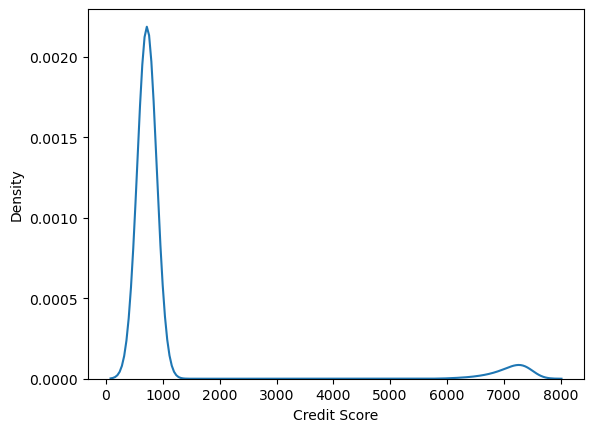

In [13]:
sns.kdeplot(df['Credit Score'])

In [14]:
df['Credit Score'].fillna(df['Credit Score'].median(),inplace=True)

<Axes: xlabel='Credit Score', ylabel='Density'>

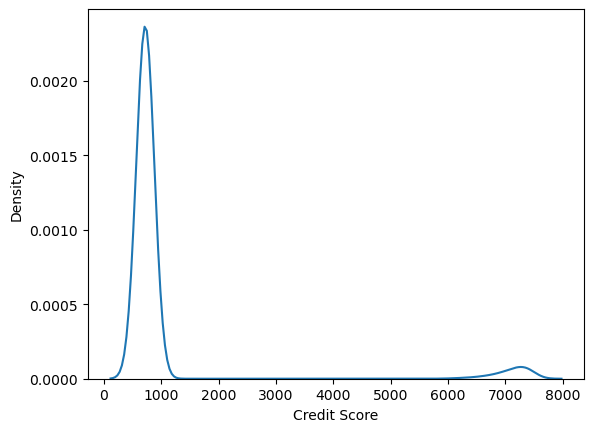

In [15]:
sns.kdeplot(df['Credit Score'])

In [16]:
df['Annual Income'].describe()

count    7.063100e+04
mean     1.375894e+06
std      1.104852e+06
min      7.662700e+04
25%      8.479320e+05
50%      1.168975e+06
75%      1.648915e+06
max      1.655574e+08
Name: Annual Income, dtype: float64

In [17]:
exp.histogram(df['Annual Income'])

In [18]:
df['Annual Income'].fillna(method='pad',inplace=True)

In [19]:
exp.histogram(df['Annual Income'])

In [20]:
df['Years in current job'].value_counts()

10+ years    24830
2 years       7218
3 years       6481
< 1 year      6383
5 years       5388
1 year        5103
4 years       4822
6 years       4516
7 years       4405
8 years       3646
9 years       3099
Name: Years in current job, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, '8 years'),
  Text(1, 0, '10+ years'),
  Text(2, 0, '3 years'),
  Text(3, 0, '< 1 year'),
  Text(4, 0, '2 years'),
  Text(5, 0, '4 years'),
  Text(6, 0, '1 year'),
  Text(7, 0, '6 years'),
  Text(8, 0, '5 years'),
  Text(9, 0, '7 years'),
  Text(10, 0, '9 years')])

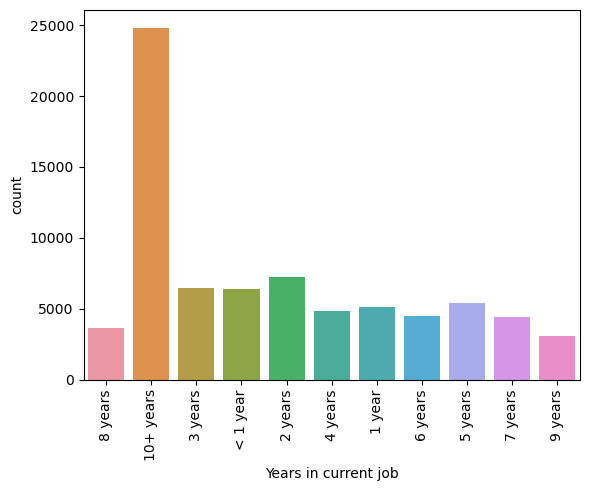

In [21]:
sns.countplot(x = df['Years in current job'])
plt.xticks(rotation = 90)

In [22]:
fill_list = list(df['Years in current job'].unique())
fill_list

['8 years',
 '10+ years',
 '3 years',
 '< 1 year',
 '2 years',
 '4 years',
 '1 year',
 '6 years',
 '5 years',
 '7 years',
 '9 years',
 nan]

In [23]:
df['Years in current job'] =  df['Years in current job'].fillna(pd.Series(np.random.choice(fill_list,size=len(df.index))))


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, '8 years'),
  Text(1, 0, '10+ years'),
  Text(2, 0, '3 years'),
  Text(3, 0, '< 1 year'),
  Text(4, 0, '2 years'),
  Text(5, 0, '4 years'),
  Text(6, 0, '1 year'),
  Text(7, 0, '6 years'),
  Text(8, 0, '5 years'),
  Text(9, 0, '7 years'),
  Text(10, 0, '9 years'),
  Text(11, 0, 'nan')])

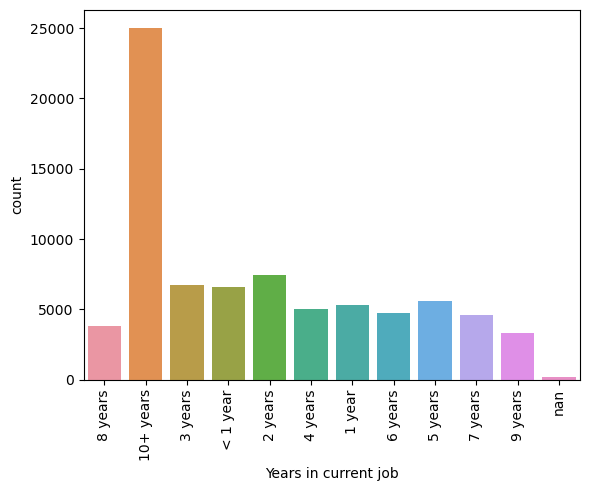

In [24]:
sns.countplot(x = df['Years in current job'])
plt.xticks(rotation = 90)

In [25]:
df.dropna(inplace=True)

In [26]:
df.isnull().sum()

Loan ID                      0
Customer ID                  0
Loan Status                  0
Current Loan Amount          0
Term                         0
Credit Score                 0
Annual Income                0
Years in current job         0
Home Ownership               0
Purpose                      0
Monthly Debt                 0
Years of Credit History      0
Number of Open Accounts      0
Number of Credit Problems    0
Current Credit Balance       0
Maximum Open Credit          0
Bankruptcies                 0
Tax Liens                    0
dtype: int64

## Dealing with Outliers

Current Loan Amount             Axes(0.125,0.653529;0.168478x0.226471)
Credit Score                 Axes(0.327174,0.653529;0.168478x0.226471)
Annual Income                Axes(0.529348,0.653529;0.168478x0.226471)
Monthly Debt                 Axes(0.731522,0.653529;0.168478x0.226471)
Years of Credit History         Axes(0.125,0.381765;0.168478x0.226471)
Number of Open Accounts      Axes(0.327174,0.381765;0.168478x0.226471)
Number of Credit Problems    Axes(0.529348,0.381765;0.168478x0.226471)
Current Credit Balance       Axes(0.731522,0.381765;0.168478x0.226471)
Maximum Open Credit                 Axes(0.125,0.11;0.168478x0.226471)
Bankruptcies                     Axes(0.327174,0.11;0.168478x0.226471)
Tax Liens                        Axes(0.529348,0.11;0.168478x0.226471)
dtype: object

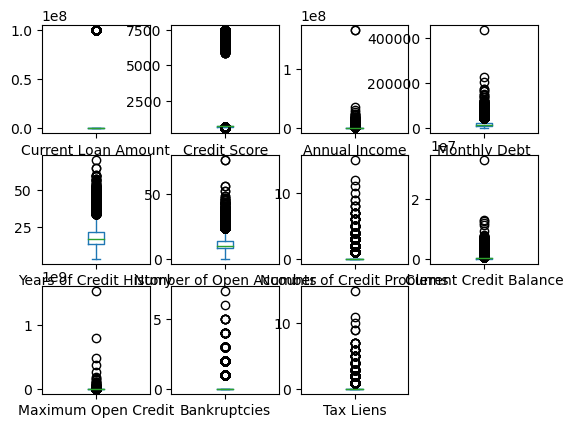

In [27]:
df.plot(kind = 'box',subplots=True,layout=(3,4))

In [28]:
num_col = ['Current Loan Amount','Credit Score','Annual Income','Monthly Debt','Years of Credit History',
'Number of Open Accounts','Current Credit Balance','Maximum Open Credit']

In [29]:
no_outlier = df.copy()
for i in num_col:
    lower_limit = df[i].quantile(0.05)
    upper_limit = df[i].quantile(0.95)
    no_outlier[i] = no_outlier[i].clip(lower_limit, upper_limit)


Current Loan Amount             Axes(0.125,0.653529;0.168478x0.226471)
Credit Score                 Axes(0.327174,0.653529;0.168478x0.226471)
Annual Income                Axes(0.529348,0.653529;0.168478x0.226471)
Monthly Debt                 Axes(0.731522,0.653529;0.168478x0.226471)
Years of Credit History         Axes(0.125,0.381765;0.168478x0.226471)
Number of Open Accounts      Axes(0.327174,0.381765;0.168478x0.226471)
Number of Credit Problems    Axes(0.529348,0.381765;0.168478x0.226471)
Current Credit Balance       Axes(0.731522,0.381765;0.168478x0.226471)
Maximum Open Credit                 Axes(0.125,0.11;0.168478x0.226471)
Bankruptcies                     Axes(0.327174,0.11;0.168478x0.226471)
Tax Liens                        Axes(0.529348,0.11;0.168478x0.226471)
dtype: object

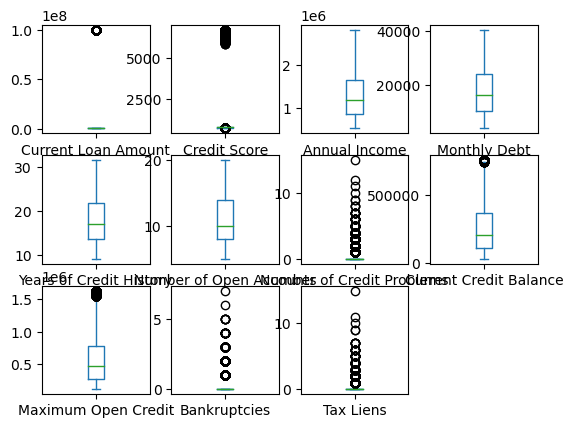

In [30]:
no_outlier.plot(kind = 'box',subplots=True,layout=(3,4))

In [31]:
df = no_outlier.copy()

## Statistical tests

In [32]:
s = (df.dtypes == 'object')
cat_col = list(s[s].index)
cat_col

['Loan ID',
 'Customer ID',
 'Loan Status',
 'Term',
 'Years in current job',
 'Home Ownership',
 'Purpose']

In [33]:
data = df.copy()
for i in cat_col:
    lb = LabelEncoder()
    data[i] = lb.fit_transform(data[i])
data

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,5932,43085,1,445412.0,1,709.0,1167493.0,8,1,5,5214.740,17.2,6.0,1.0,228190.0,416746.0,1.0,0.0
1,20354,13007,1,262328.0,1,729.0,1167493.0,1,1,3,33295.980,21.1,20.0,0.0,229976.0,850784.0,0.0,0.0
2,22492,26962,1,99999999.0,1,741.0,2231892.0,8,2,3,29200.530,14.9,18.0,1.0,297996.0,750090.0,0.0,0.0
3,33876,65559,1,347666.0,0,721.0,806949.0,3,2,3,8741.900,12.0,9.0,0.0,256329.0,386958.0,0.0,0.0
5,39135,22718,0,206602.0,1,6740.0,896857.0,1,1,3,16367.740,17.3,6.0,0.0,215308.0,272448.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99990,29693,7500,1,99999999.0,1,742.0,1190046.0,10,3,11,11969.810,20.1,9.0,0.0,37392.0,134442.0,0.0,0.0
99994,37751,54024,1,210584.0,1,719.0,783389.0,0,1,7,3821.413,17.4,6.0,0.0,30204.3,259160.0,0.0,0.0
99996,1956,34026,1,99999999.0,1,732.0,1289416.0,0,3,3,13109.050,9.4,20.0,0.0,153045.0,509234.0,0.0,0.0
99997,64043,12742,1,103136.0,1,742.0,1150545.0,6,3,3,7315.570,18.8,12.0,1.0,109554.0,537548.0,1.0,0.0


In [34]:
data.corr()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
Loan ID,1.000000,0.005352,0.004733,-0.001628,-0.001277,0.001884,0.003563,-0.005488,0.000035,-0.004451,0.003663,0.000738,0.001789,0.001333,0.003464,0.003584,-0.000020,-0.002384
Customer ID,0.005352,1.000000,0.002465,-0.000085,-0.004504,-0.002391,0.002882,-0.005042,-0.004451,-0.001548,0.006734,0.008639,-0.001779,0.003224,0.001807,-0.001140,0.000839,0.001399
Loan Status,0.004733,0.002465,1.000000,0.235704,0.136005,-0.429823,0.078093,-0.014867,-0.056449,-0.002988,-0.018357,0.034716,-0.016546,-0.003898,-0.000564,0.050582,0.007409,-0.012047
Current Loan Amount,-0.001628,-0.000085,0.235704,1.000000,0.059345,-0.100226,0.021075,-0.000499,-0.009973,-0.000601,-0.011678,0.013342,-0.003133,-0.002711,0.005760,0.031025,0.001711,-0.003929
Term,-0.001277,-0.004504,0.136005,0.059345,1.000000,-0.052603,-0.112623,0.026060,0.107379,0.048198,-0.167290,-0.041848,-0.079638,0.024587,-0.153081,-0.119311,0.027382,0.002568
Credit Score,0.001884,-0.002391,-0.429823,-0.100226,-0.052603,1.000000,-0.035662,0.005166,0.022365,-0.009868,0.001972,-0.016652,0.005809,-0.001621,0.007090,-0.016463,-0.005250,0.005868
Annual Income,0.003563,0.002882,0.078093,0.021075,-0.112623,-0.035662,1.000000,-0.062366,-0.227408,-0.019766,0.537100,0.217534,0.192845,-0.022028,0.379358,0.368075,-0.053954,0.038991
Years in current job,-0.005488,-0.005042,-0.014867,-0.000499,0.026060,0.005166,-0.062366,1.000000,0.074394,0.004109,-0.067698,-0.106050,-0.026303,-0.010995,-0.061811,-0.054394,-0.010127,-0.006139
Home Ownership,0.000035,-0.004451,-0.056449,-0.009973,0.107379,0.022365,-0.227408,0.074394,1.000000,0.030296,-0.211495,-0.206284,-0.139400,-0.002254,-0.210800,-0.221513,0.005108,-0.005492
Purpose,-0.004451,-0.001548,-0.002988,-0.000601,0.048198,-0.009868,-0.019766,0.004109,0.030296,1.000000,-0.075417,-0.022988,-0.082525,0.002725,-0.109788,-0.073160,-0.006052,0.006030


In [35]:
from sklearn.feature_selection import SelectKBest,chi2
xl,yl = data.drop('Loan Status',axis = 1), data['Loan Status']
    
bestfeatures = SelectKBest(score_func=chi2, k='all')
dfit = bestfeatures.fit(xl,yl)

df_scores = pd.DataFrame(dfit.scores_)
df_cols = pd.DataFrame(xl.columns)

feature_importance = pd.concat([df_cols, df_scores],axis=1)
feature_importance.columns = ['Feature','Score']
feature_importance.sort_values(by = 'Score',ascending=False)

,Feature,Score
2,Current Loan Amount,3.621747e+11
5,Annual Income,1.368089e+08
14,Maximum Open Credit,5.767472e+07
4,Credit Score,2.633979e+07
9,Monthly Debt,1.466275e+05
0,Loan ID,2.115984e+04
1,Customer ID,5.741355e+03
13,Current Credit Balance,3.711682e+03
3,Term,3.888877e+02
10,Years of Credit History,1.965158e+02


## Modeling

### Logistic regression

In [36]:
x,y = data.drop('Loan Status',axis = 1),data['Loan Status']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=42)

In [37]:
scale = StandardScaler()
x_train = scale.fit_transform(x_train)
x_test = scale.fit_transform(x_test)

In [38]:
model = LogisticRegression(penalty='l2', C=1.0, max_iter=100, random_state=42)

In [39]:
model.fit(x_train,y_train)

LogisticRegression(random_state=42)

In [40]:
model.score(x_train,y_train)

0.8112187468021966

In [46]:
y_pred_lr = model.predict(x_train)
f1_score(y_train,y_pred_lr)

0.8885958997171871

In [42]:
model.score(x_test,y_test)


0.810642107955999

In [48]:
from sklearn.metrics import classification_report,confusion_matrix

In [55]:
con = confusion_matrix(y_train,y_pred_lr)

In [72]:
print(classification_report(y_train,y_pred_lr))

              precision    recall  f1-score   support

           0       0.99      0.24      0.38     14457
           1       0.80      1.00      0.89     44177

    accuracy                           0.81     58634
   macro avg       0.90      0.62      0.64     58634
weighted avg       0.85      0.81      0.76     58634



In [54]:
from mlxtend.plotting import plot_confusion_matrix

(<Figure size 640x480 with 1 Axes>,
 <Axes: xlabel='predicted label', ylabel='true label'>)

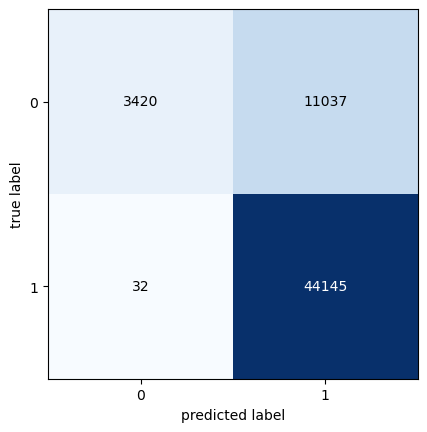

In [56]:
plot_confusion_matrix(con)

In [49]:
from sklearn.ensemble import RandomForestClassifier

In [50]:
ran = RandomForestClassifier(n_estimators=6,max_depth=5)

In [51]:
ran.fit(x_train,y_train)

RandomForestClassifier(max_depth=5, n_estimators=6)

In [52]:
ran.score(x_train,y_train)

0.8112016918511444

In [57]:
y_pred_ran = ran.predict(x_train)

In [58]:
con_ran = confusion_matrix(y_train,y_pred_ran)

In [73]:
print(classification_report(y_train,y_pred_ran))

              precision    recall  f1-score   support

           0       1.00      0.23      0.38     14457
           1       0.80      1.00      0.89     44177

    accuracy                           0.81     58634
   macro avg       0.90      0.62      0.63     58634
weighted avg       0.85      0.81      0.76     58634



(<Figure size 640x480 with 1 Axes>,
 <Axes: xlabel='predicted label', ylabel='true label'>)

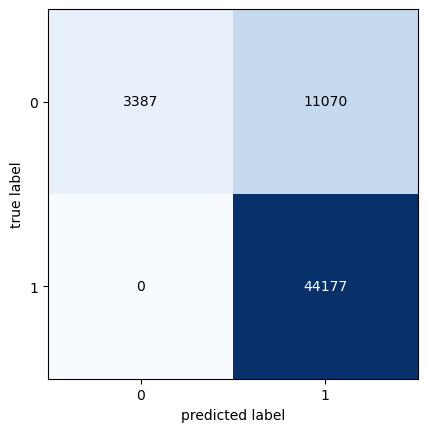

In [59]:
plot_confusion_matrix(con_ran)

In [61]:
from xgboost import XGBClassifier

In [68]:
xgb = XGBClassifier(n_estimator = 6,max_depth = 5)

In [69]:
xgb.fit(x_train,y_train)

[22:28:48] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "n_estimator" } are not used.



XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimator=6, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, predictor=None, ...)

In [70]:
xgb.score(x_train,y_train)

0.8276085547634479

In [74]:
print(classification_report(y_train,xgb.predict(x_train)))

              precision    recall  f1-score   support

           0       0.95      0.32      0.48     14457
           1       0.82      0.99      0.90     44177

    accuracy                           0.83     58634
   macro avg       0.88      0.66      0.69     58634
weighted avg       0.85      0.83      0.79     58634



In [75]:
from sklearn.model_selection import KFold,cross_val_score

In [77]:
K_fold = KFold(n_splits=8,shuffle = True, random_state=42)
cross_val_score(xgb,x_train,y_train,cv = K_fold,scoring = 'accuracy')

[22:40:17] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "n_estimator" } are not used.

[22:40:26] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "n_estimator" } are not used.

[22:40:31] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "n_estimator" } are not used.

[22:40:37] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "n_estimator" } are not used.

[22:40:42] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "n_estimator" } are not us

array([0.8207367 , 0.80641201, 0.8027016 , 0.80843226, 0.8085687 ,
       0.80802292, 0.80447537, 0.8085687 ])

In [78]:
from sklearn.model_selection import GridSearchCV

In [79]:
param_grid = {'max_depth':[4,5,6], 'n_estimator': [6,7,8]}

In [80]:
clf = XGBClassifier()
grid = GridSearchCV(estimator=clf,param_grid=param_grid,cv = 5)
grid_result = grid.fit(x_train,y_train)

[22:47:21] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "n_estimator" } are not used.

[22:47:25] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "n_estimator" } are not used.

[22:47:29] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "n_estimator" } are not used.

[22:47:33] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "n_estimator" } are not used.

[22:47:36] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "n_estimator" } are not us

In [81]:
print('Best  %f using %s' %(grid_result.best_score_,grid_result.best_params_))

Best  0.810383 using {'max_depth': 4, 'n_estimator': 6}


In [83]:
model = grid_result.best_estimator_
model

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimator=6, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, predictor=None, ...)

In [90]:
model.predict(x_test)

array([1, 1, 1, ..., 1, 0, 1])

In [94]:
print(classification_report(y_train,model.predict(y_train)))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00     14457
           1       0.75      1.00      0.86     44177

    accuracy                           0.75     58634
   macro avg       0.38      0.50      0.43     58634
weighted avg       0.57      0.75      0.65     58634



c:\Users\jamal\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

c:\Users\jamal\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

c:\Users\jamal\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



### KNN

In [43]:
training_accuracy = []
testing_accuracy = []
for i in range(1,26):
   knn = KNeighborsClassifier(n_neighbors=i)
   knn.fit(x_train,y_train)
   training_accuracy.append(knn.score(x_train,y_train))
   testing_accuracy.append(knn.score(x_test,y_test))

num = [i for i in range(1,26)]
plt.plot(num,training_accuracy,label = 'Trainig accuracy')
plt.plot(num,testing_accuracy,label = 'Testing accuracy')
plt.legend()
plt.show()


KeyboardInterrupt: 

## SVM

In [ ]:
kernel = ['linear','poly','rbf','sigmoid']

In [44]:
model = SVC()

In [45]:
model.fit(x_test,y_test)

SVC()

In [46]:
model.score(x_test,y_test)

0.8111025837810182

## Decision tree

In [42]:
from sklearn.tree import DecisionTreeClassifier

In [66]:
dt = DecisionTreeClassifier(max_depth=4,max_features=12)

In [67]:
dt.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=4, max_features=12)

In [68]:
dt.score(x_train,y_train)

0.8112187468021966

In [69]:
dt.score(x_test,y_test)

0.8105397799948836

In [70]:
from sklearn import tree

[Text(0.75, 0.9, 'x[4] <= 1.598\ngini = 0.372\nsamples = 58634\nvalue = [14457, 44177]'),
 Text(0.625, 0.7, 'x[2] <= -0.398\ngini = 0.32\nsamples = 55246\nvalue = [11069, 44177]'),
 Text(0.5, 0.5, 'x[3] <= -0.525\ngini = 0.361\nsamples = 46759\nvalue = [11069, 35690]'),
 Text(0.25, 0.3, 'x[7] <= 0.6\ngini = 0.438\nsamples = 12737\nvalue = [4131, 8606]'),
 Text(0.125, 0.1, 'gini = 0.416\nsamples = 8488\nvalue = [2507, 5981]'),
 Text(0.375, 0.1, 'gini = 0.472\nsamples = 4249\nvalue = [1624, 2625]'),
 Text(0.75, 0.3, 'x[4] <= -0.235\ngini = 0.325\nsamples = 34022\nvalue = [6938, 27084]'),
 Text(0.625, 0.1, 'gini = 0.356\nsamples = 24471\nvalue = [5658, 18813]'),
 Text(0.875, 0.1, 'gini = 0.232\nsamples = 9551\nvalue = [1280, 8271]'),
 Text(0.75, 0.5, 'gini = 0.0\nsamples = 8487\nvalue = [0, 8487]'),
 Text(0.875, 0.7, 'gini = 0.0\nsamples = 3388\nvalue = [3388, 0]')]

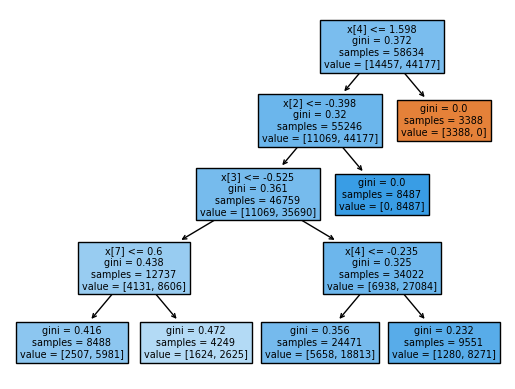

In [71]:
tree.plot_tree(dt,filled=True)

In [75]:
feat_impo = pd.DataFrame({
    'features' : x.columns,
    'Importance' : dt.feature_importances_
})

In [77]:
feat_impo.sort_values(by = 'Importance',ascending=False)

,features,Importance
4,Credit Score,0.790475
2,Current Loan Amount,0.151083
3,Term,0.050426
7,Home Ownership,0.008016
0,Loan ID,0.000000
11,Number of Open Accounts,0.000000
15,Bankruptcies,0.000000
14,Maximum Open Credit,0.000000
13,Current Credit Balance,0.000000
12,Number of Credit Problems,0.000000


<Axes: xlabel='features'>

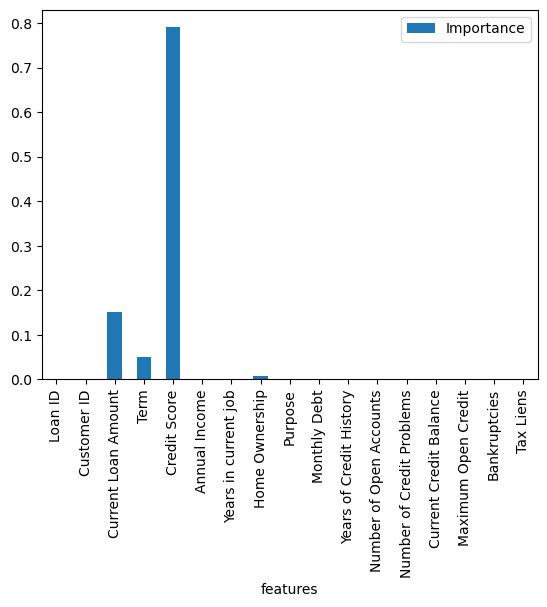

In [79]:
feat_impo.plot.bar('features','Importance')
